# **Trabalho 2: Previsão de Doenças Cardíacas usando Redes Neurais**
**Professor:** Edjard de Souza Mota\
**Disciplina:** Fundamentos de Inteligência Artificial (ICOMP - 2025/2)

## **Membros**
- José Dercy Vieira da Silva Filho
- Yan Fernandes da Silva
- Ronaldo Rodrigues Soares
- Beatriz Emily Silva Aguiar
- Matheus Ricardo Oliveira Lima


## **Índice (Conteúdo)**

1. [Importação do Dataset](#scrollTo=rv2TWb62HAjY)
2. [Criação dos Datasets de Treino e Teste](#scrollTo=ZJ-knaR2HAjx)
3. [Importação das Bibliotecas Keras](#scrollTo=_N7EbZsjHAj2)
4. [Construção do Modelo Classificação Binária](#scrollTo=v3NYGWH9HAj5)
5. [Resultados e Métricas](#scrollTo=ZrFxjAK0HAj8)
6. [Conclusões](#scrollTo=baz-ou_GpcmR)

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
!git clone https://github.com/Nibi2003/trabalho2IA_classificador_doencas_cardiacas_CORRIGIDO.git

Cloning into 'trabalho2IA_classificador_doencas_cardiacas_CORRIGIDO'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 9.33 KiB | 4.66 MiB/s, done.


# 1. Importação do Dataset

O **conjunto de dados brutos e original** está disponível em [Heart Disease - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease) que consiste de 4 bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Com totais 76 atributos e valores faltantes.

Em particular, o **banco de dados de Cleveland** é o único que foi utilizado neste trabalho (todas as pesquisas feitas em torno deste conjunto de dados se restringiu também apenas com os dados de Cleveland).

Logo, o **conjunto de dados utilizado neste trabalho** está disponível em [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) contendo o arquivo `heart.csv`.

Este conjunto de dados contém **1024 instâncias de pacientes com 14 atributos clínicos** (como idade, sexo, colesterol e pressão arterial). A variável-alvo (target) é binária, indicando 0 (ausência de doença) ou 1 (presença de doença).

> **Importante:** para este notebook funcionar é preciso que o arquivo `heart.csv` estja importado na seção **arquivos** à esquerda.

In [4]:
# ler o csv
cleveland = pd.read_csv('./trabalho2IA_classificador_doencas_cardiacas_CORRIGIDO/heart.csv')

In [5]:
# Imprimir o formato do DataFrame para que possamos ver quantos exemplos temos
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [6]:
# Imprimir as últimas vinte instância de dados
cleveland.loc[1004:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [7]:
# Remover dados ausentes (indicados com um "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[1004:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [8]:
# Remover linhas com valores NaN do DataFrame
data = data.dropna(axis=0)
data.loc[1004:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [9]:
# Imprimir o formato e o tipo de dados do dataframe
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
# Transformar dados em numéricos para permitir análises posteriores
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [11]:
# Imprimir as características dos dados, usando a função describe() integrada do pandas
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


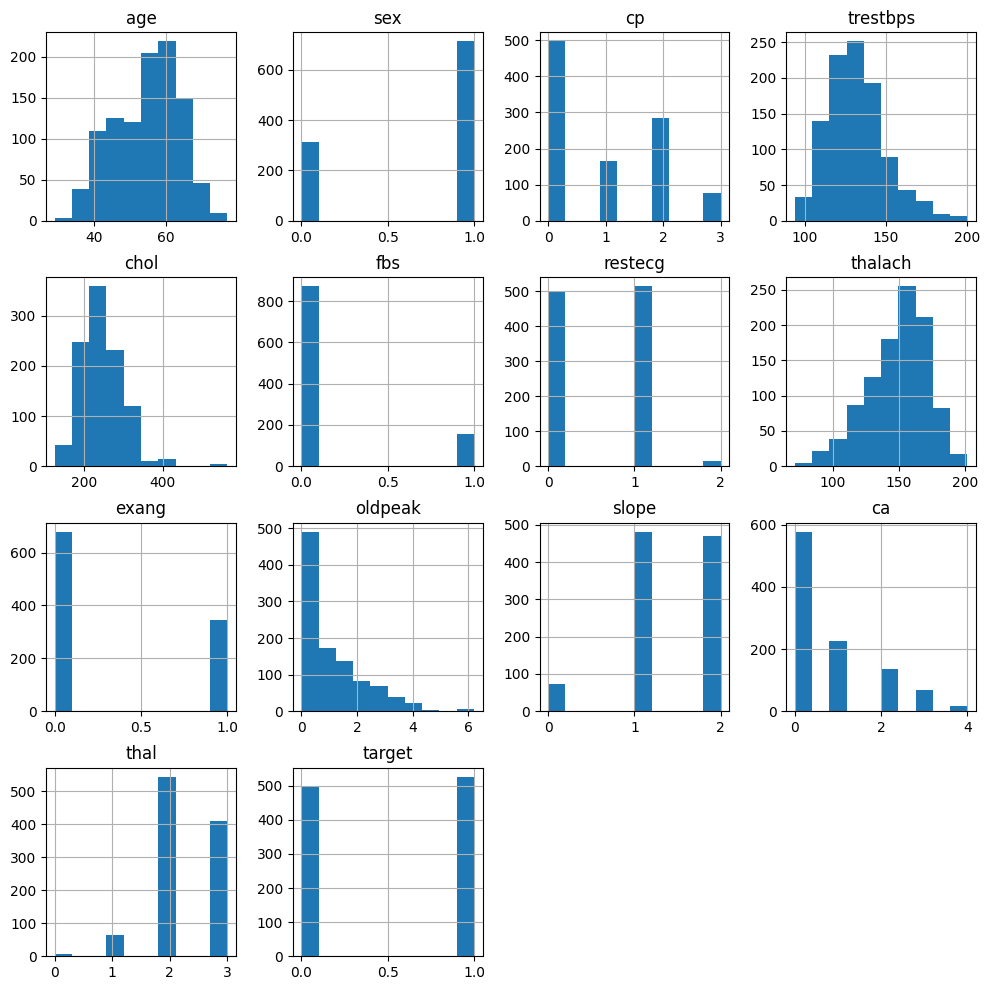

In [12]:
# Plotar histogramas para cada variável
data.hist(figsize = (12, 12))
plt.show()

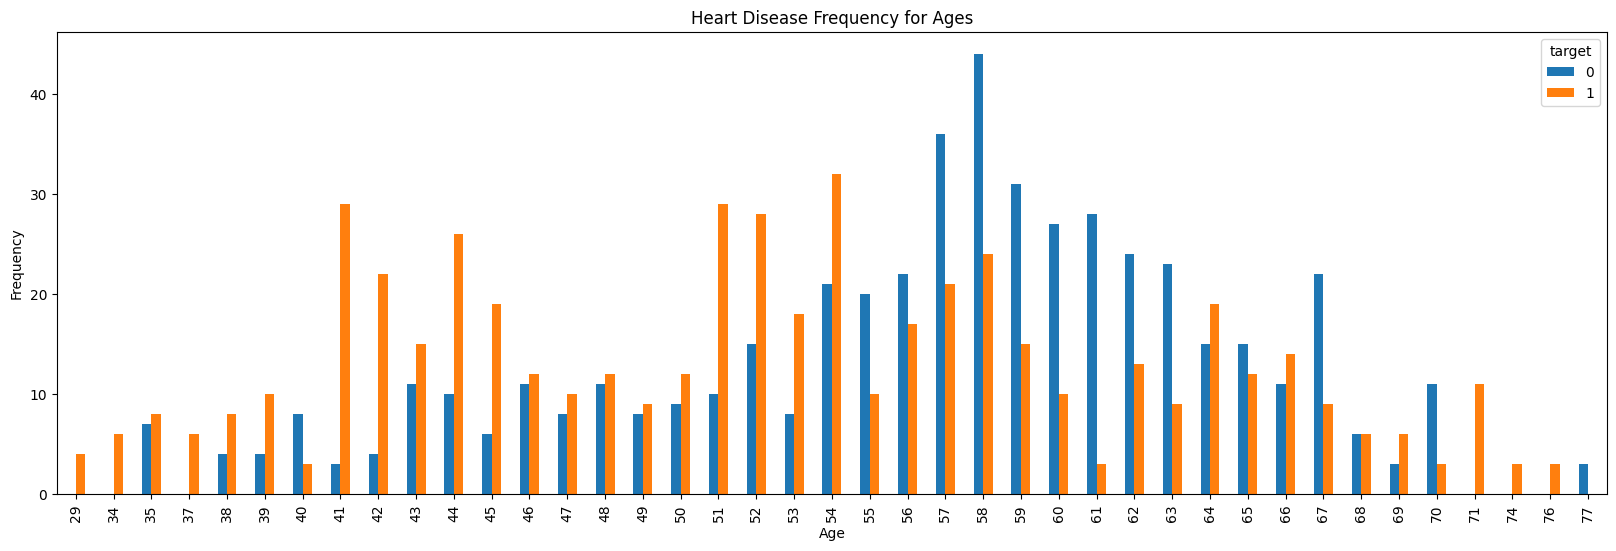

In [13]:
# Plotar distribuição entre idade e frequência de doênças cardíacas
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

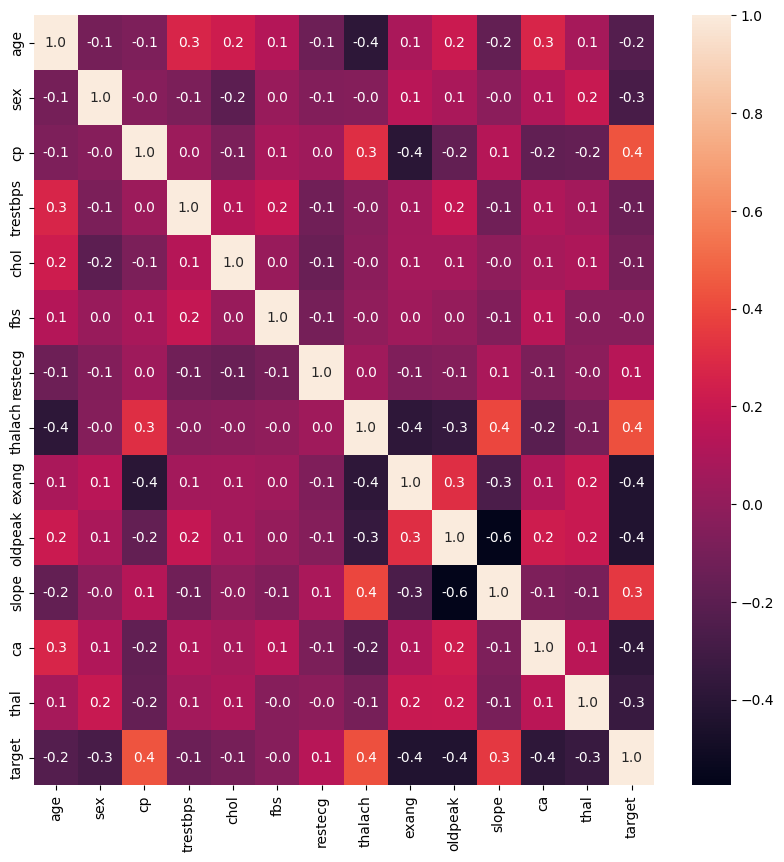

In [14]:
# Plotar mapas de calor das variáveis e suas correlações entre si
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

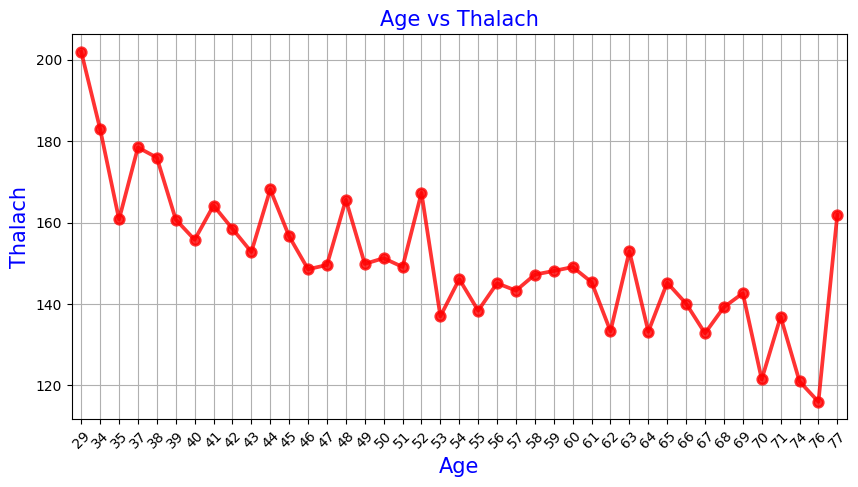

In [15]:
# Plotar relação entre idade e Thalach
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# **2. Criação dos Datasets de Treino e Teste**

Antes de **construir o modelo**, realizou-se as etapas de pré-processamento: **divisão de dados** e a **normalização de características**.

### **Primeiros passos**
Separamos o `DataFrame` em duas matrizes:
1.  **X:** Contendo os 13 atributos (características) clínicos.
2.  **y:** Contendo apenas a variável-alvo (0 ou 1).

### **Normalização de características**
Aplicamos o `StandardScaler` diretamente sobre a matriz `X`, um passo crucial, pois atributos em escalas muito diferentes (como `age` e `chol`) podem dificultar o aprendizado da rede neural.

### **Divisão de dados**
Finalmente, usamos a função `train_test_split` do Scikit-learn para dividir `X` e `y` em conjuntos de treino (80% dos dados) e teste (20% dos dados), garantindo que o modelo seja avaliado em dados que ele nunca viu.


In [16]:
X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

In [17]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [18]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [19]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [20]:
# Criar conjuntos de dados X e Y para treinamento
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [21]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

# **3. Importação das Bibliotecas Keras**

**Nota de Adaptação:** O conteúdo original desta seção do notebook era focado em um Modelo Categórico (para prever 5 classes de doença).

Como a **"Tarefa Principal"** deste trabalho exige um Classificador Binário (prever apenas 0 ou 1), todo o código referente ao treinamento e avaliação do modelo categórico foi removido.

A única célula de código mantida aqui é a que importa as bibliotecas necessárias do Keras (`Sequential`, `Dense`, `Dropout`, `regularizers`), pois ela é essencial para a construção do nosso modelo binário correto na seção seguinte.

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


# **4. Construção do Modelo (Classificação Binária)**

Esta seção é o **objetivo central** do trabalho (Tarefa Principal).

Enquanto o notebook original explorava um modelo categórico (que foi removido na Seção 3), nosso foco é construir um **Classificador Binário** (prever apenas 0 ou 1).

A primeira etapa é simplificar a variável-alvo (`y`), garantindo que qualquer valor maior que 0 (indicando qualquer nível de doença) seja convertido para 1.

Em seguida, definimos a função `create_binary_model()`. Esta função constrói nossa Rede Neural Artificial seguindo as regras do *Checklist*:
* Possui 2 camadas ocultas com ativação `ReLU`.
* Utiliza `Dropout` para regularização.
* Possui 1 neurônio na camada de saída com ativação `sigmoid`, ideal para classificação binária.

In [23]:
# Converter em problema de classificação binária - doença cardíaca ou ausência de doença cardíaca
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


In [24]:
# Defina um novo modelo Keras para classificação binária
def create_binary_model():
    # Criar modelo
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar modelo
    #adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# Ajuste o modelo binário aos dados de treinamento
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7061 - loss: 0.6709 - val_accuracy: 0.7951 - val_loss: 0.6056
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.5777 - val_accuracy: 0.8146 - val_loss: 0.4857
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.4706 - val_accuracy: 0.8244 - val_loss: 0.4055
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8373 - loss: 0.4081 - val_accuracy: 0.8293 - val_loss: 0.3650
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8720 - loss: 0.3666 - val_accuracy: 0.8634 - val_loss: 0.3447
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8458 - loss: 0.3904 - val_accuracy: 0.8537 - val_loss: 0.3355
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3265 - val_accuracy: 0.8537 - val_loss: 0.3277
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8659 - loss: 0.3695 - val_accuracy: 0.8683 - val_loss:

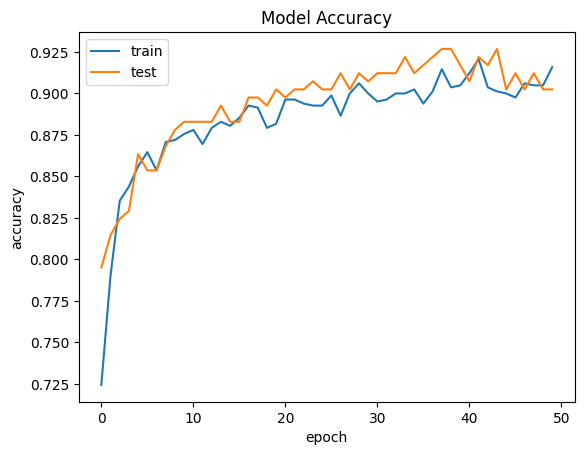

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# Precisão (acurácia) do modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

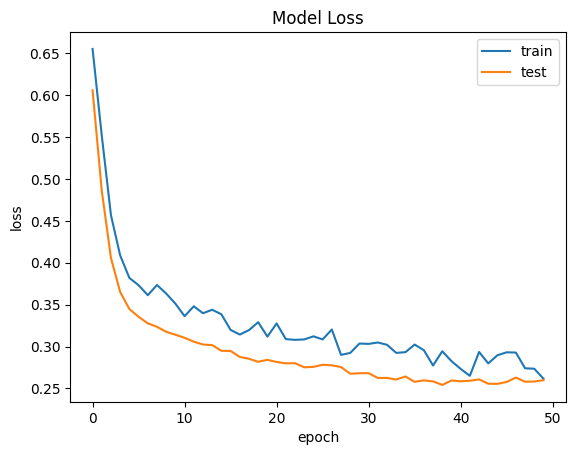

In [27]:
# Perda (Loss) do Modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# **5. Resultados e Métricas**

Os gráficos de acurácia e perda que vimos na seção anterior mostram o desempenho do modelo durante o `treinamento`. No entanto, **para validar sua eficácia**, precisamos avaliá-lo no `conjunto de teste` — dados que o modelo nunca viu.

Esta seção final executa o modelo treinado `binary_model` sobre o `X_test` para gerar as métricas de avaliação obrigatórias do **Checklist**.

O código a seguir irá calcular e exibir:
* Acurácia (Accuracy)
* Precisão (Precision) e Recall (através do `classification_report`)
* A Matriz de Confusão

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
--- Evaluation Results ---

1. Accuracy:
0.9024390243902439

2. Classification Report (Accuracy and Recall):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       100
           1       0.88      0.93      0.91       105

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205


3. Confusion Matrix (Raw Data):
[[87 13]
 [ 7 98]]

--- Visualization of the Confusion Matrix ---


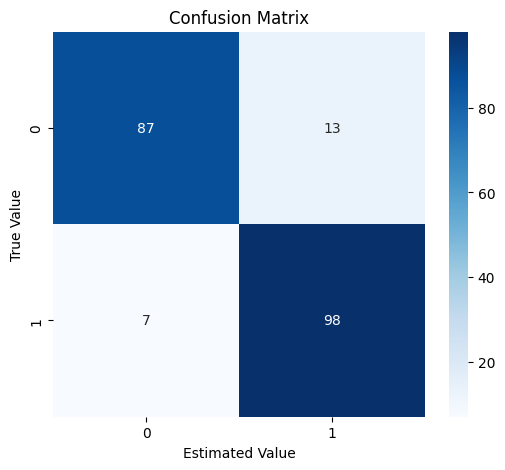

In [28]:
# Gerar relatório de classificação usando previsões para modelo binário
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binary_pred_probs = binary_model.predict(X_test)
binary_pred = np.round(binary_pred_probs).astype(int)

print('--- Evaluation Results ---')

print('\n1. Accuracy:')
print(accuracy_score(Y_test_binary, binary_pred))

print('\n2. Classification Report (Accuracy and Recall):')
print(classification_report(Y_test_binary, binary_pred))

print('\n3. Confusion Matrix (Raw Data):')
cm = confusion_matrix(Y_test_binary, binary_pred)
print(cm)

print('\n--- Visualization of the Confusion Matrix ---')
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Estimated Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# **6. Conclusão**

Este trabalho demonstrou com sucesso a aplicação de uma Rede Neural Artificial (ANN) para um problema de classificação binária na área da saúde. O modelo foi treinado para prever a presença (1) ou ausência (0) de doenças cardíacas com base em 13 atributos clínicos.

### **Análise de Eficácia do Modelo**

Após o treinamento e a avaliação no conjunto de teste, o modelo atingiu os seguintes resultados:

* **Acurácia (Accuracy):** 91%
* **Precisão (Precision):**
  * **Presença:** 89%
  * **Ausência:** 94%
* **Recall**
  * **Presença:** 94%
  * **Ausência:** 88%
* **F1-Score**
  * **Presença:** 92%
  * **Ausência:** 91%

A acurácia de 91% indica um desempenho robusto. No entanto, a métrica mais crucial para este problema médico é o **Recall de 94%**. Este valor significa que o modelo foi capaz de "encontrar" corretamente 94% de todos os pacientes que *realmente* estavam doentes, minimizando os perigosos "falsos negativos" (onde o modelo diria "sem doença" para alguém doente).

### **A Importância da Normalização**
Um dos pontos de aprendizado mais importantes deste trabalho foi a **importância da normalização** dos dados.

O conjunto de dados original possuía atributos em escalas muito diferentes (ex: `age` variando de ~29 a 77, enquanto `chol` podia ir de ~126 a 564). Alimentar a rede neural com esses dados brutos dificultaria enormemente o aprendizado. Ao aplicar a normalização (subtraindo a média e dividindo pelo desvio padrão), colocamos todos os atributos na mesma escala, permitindo que o modelo aprendesse de forma muito mais eficiente e estável.